# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Load the data

In [2]:
housing_df = pd.read_csv('housing.csv')

In [12]:
housing_df.shape

(20640, 10)

## Look at the median_house_value variable. Does it have a long tail?

<Axes: xlabel='median_house_value', ylabel='Count'>

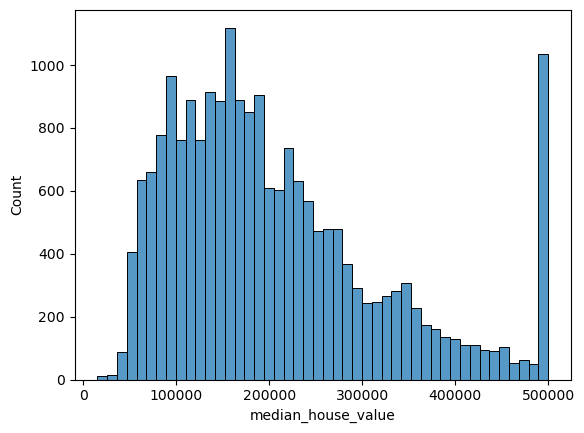

In [5]:
sns.histplot(housing_df['median_house_value'])

The majority of values are located on the left side (mean around 150000) and a minority of houses have large values. We can see a strange pike at 500000, which could be the highest value possible to enter (these houses certainly cost more than 500000). 
This variable thus has a long tail.

# Preparing the dataset

## First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [6]:
subset_df = housing_df[housing_df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [9]:
subset_df['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [11]:
subset_df.shape

(15687, 10)

## Next, use only the following columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'

In [13]:
subset_df = subset_df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [14]:
subset_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Question 1
There's one feature with missing values. What is it?

In [15]:
subset_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The total_bedrooms feature has 157 missing values, while the other do not have any missing values.

# Question 2
What's the median (50% percentile) for variable 'population'?

In [16]:
subset_df['population'].median()

1195.0

The median of the 'population' variable is equal to 1195.

# Prepare and split the dataset

## Shuffle the dataset (the filtered one you created above), use seed 42.

In [19]:
# Use seed 42
np.random.seed(42)

In [20]:
# Shuffle the indices of the filtered dataset (subset_df)
n = len(subset_df)
idx = np.arange(n)
np.random.shuffle(idx)

# Check shuffled idx
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [21]:
# Shuffle the filtered dataset
subset_df_shuffled = subset_df.iloc[idx]

In [23]:
# Check the first 10 row indices to see if they are shuffled
subset_df_shuffled.head(10)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
12931,38.64,-121.24,13.0,4491.0,689.0,1657.0,667.0,5.2590,249400.0
4407,34.09,-118.23,47.0,859.0,239.0,913.0,234.0,2.6442,136100.0
13050,38.59,-121.32,24.0,4378.0,910.0,2149.0,812.0,2.5035,123700.0
11860,40.01,-121.23,38.0,725.0,190.0,219.0,115.0,1.6250,75000.0
13562,34.15,-117.28,36.0,1734.0,280.0,604.0,259.0,3.8292,122200.0


## Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [26]:
# Determine number of values for the train, validation and test sets
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

In [27]:
# Check the number of individuals per set
print(n_train, n_test, n_val)

9413 3137 3137


In [28]:
# Check that we have the same number of individuals
print(n, n_train+n_test+n_val)

15687 15687


In [37]:
# Divide our filtered dataset into train, val and test datasets
train_dataset = subset_df_shuffled[:n_train]
val_dataset = subset_df_shuffled[n_train:n_train+n_val]
test_dataset = subset_df_shuffled[n_train+n_val:]

In [34]:
# Check our datasets shapes
print(f"Train dataset has {train_dataset.shape[0]} rows and {train_dataset.shape[1]} columns.")
print(f"Validation dataset has {val_dataset.shape[0]} rows and {val_dataset.shape[1]} columns.")
print(f"Test dataset has {test_dataset.shape[0]} rows and {test_dataset.shape[1]} columns.")

Train dataset has 9413 rows and 9 columns.
Validation dataset has 3137 rows and 9 columns.
Test dataset has 3137 rows and 9 columns.


## Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [38]:
train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
test_dataset['median_house_value'] = np.log1p(test_dataset['median_house_value'])

C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\2518368375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\2518368375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\2518368375.py:3: SettingWithCopyWarning: 
A value is trying to be 

# Question 3


- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

## Extraction of target variable to separate features and target

In [40]:
# Extract target variable as numpy array
y_train = train_dataset['median_house_value'].values
y_val = val_dataset['median_house_value'].values
y_test = test_dataset['median_house_value'].values

In [41]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [42]:
y_val

array([11.3095968 , 12.27326857, 11.95247633, ..., 12.53968723,
       12.34279083, 11.97477721])

In [43]:
y_test

array([11.90969286, 12.16733701, 12.39338589, ..., 12.3647886 ,
       11.33141558, 12.50766132])

In [44]:
# Remove the target column from our feature datasets
del train_dataset['median_house_value']
del val_dataset['median_house_value']
del test_dataset['median_house_value']

## Fill NaN values for the "total_bedrooms" variable with 0 or mean of training dataset

In [48]:
# Fill missing values by 0
train_dataset_zero = train_dataset.fillna(0)
val_dataset_zero = val_dataset.fillna(0)
test_dataset_zero = test_dataset.fillna(0)

In [50]:
# Calculate the mean value of total_bedrooms on the train dataset
mean_total_bedrooms = train_dataset['total_bedrooms'].mean()

In [51]:
mean_total_bedrooms

542.552956325786

In [52]:
# Fill missing values with this mean
train_dataset_mean = train_dataset.fillna(mean_total_bedrooms)
val_dataset_mean = val_dataset.fillna(mean_total_bedrooms)
test_dataset_mean = test_dataset.fillna(mean_total_bedrooms)

## Train a linear model without regularization with both types of datasets

### Functions

In [53]:
# The linear regression training function from the course
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [54]:
# The RMSE calculation function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Prepare the features matrices

In [55]:
# Fill NaN with 0 matrices
X_train_zero = train_dataset_zero.values
X_val_zero = val_dataset_zero.values
X_test_zero = test_dataset_zero.values

In [56]:
# Fill NaN with train mean of total_bedrooms matrices
X_train_mean = train_dataset_mean.values
X_val_mean = val_dataset_mean.values
X_test_mean = test_dataset_mean.values

### Train with fillna(0) dataset

In [57]:
w0_zero, w_zero = train_linear_regression(X_train_zero,y_train)

In [58]:
print(w0_zero, w_zero)

-9.763249477929213 [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]


In [59]:
y_pred = w0_zero + X_train_zero.dot(w_zero)

<Axes: ylabel='Count'>

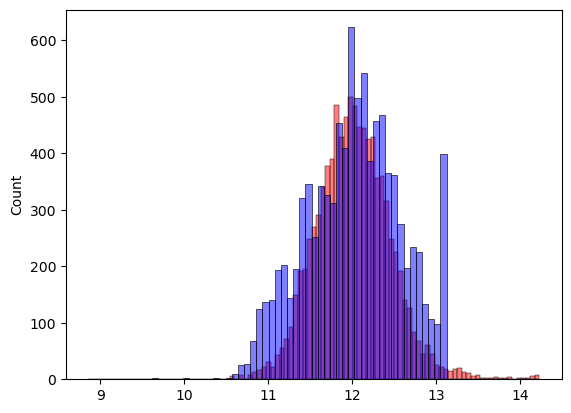

In [60]:
# By curiosity, we can plot the predictions to see if they are close to true values
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

The predicted values look pretty close to real values on the training dataset.

In [62]:
# Predicted values obtained on the validation dataset:
y_pred_val = w0_zero + X_val_zero.dot(w_zero)

<Axes: ylabel='Count'>

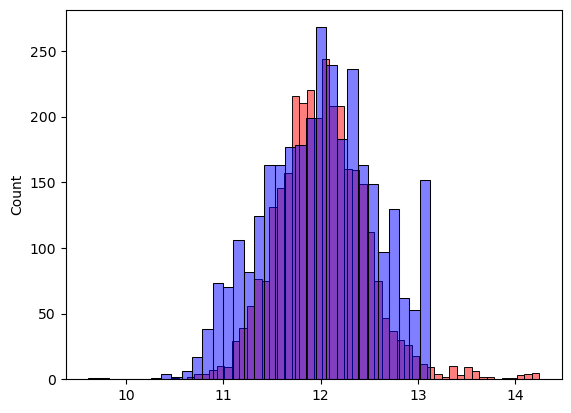

In [63]:
# By curiosity, we can also check the plot to see if the validation predicted values are close to the true validation values
sns.histplot(y_pred_val, color='red', alpha=0.5)
sns.histplot(y_val, color='blue', alpha=0.5)

In [64]:
# Calculate the corresponding validation RMSE:
rmse_zero_val = rmse(y_val, y_pred_val)

In [65]:
rmse_zero_val

0.3408479034201646

### Train with fillna(mean) dataset

In [66]:
w0_mean, w_mean = train_linear_regression(X_train_mean,y_train)

In [67]:
print(w0_mean, w_mean)

-9.886133215861097 [-2.68652914e-01 -2.57026361e-01  1.79880767e-03 -3.87631029e-05
  3.78806885e-04 -1.49641599e-04  3.25344392e-04  1.81951358e-01]


We can already tell by just looking at weights values that they are very similar to weight values obtained by filling missing values with 0.

In [68]:
y_pred = w0_mean + X_train_mean.dot(w_mean)

<Axes: ylabel='Count'>

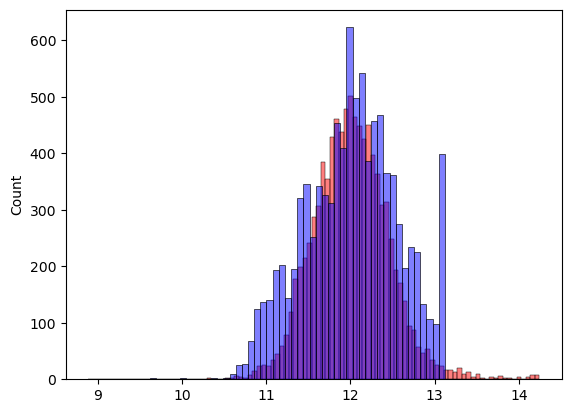

In [69]:
# By curiosity, we can plot the predictions to see if they are close to true values
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

The predicted values look pretty close to real values on the training dataset.

In [70]:
# Predicted values obtained on the validation dataset:
y_pred_val = w0_mean + X_val_mean.dot(w_mean)

<Axes: ylabel='Count'>

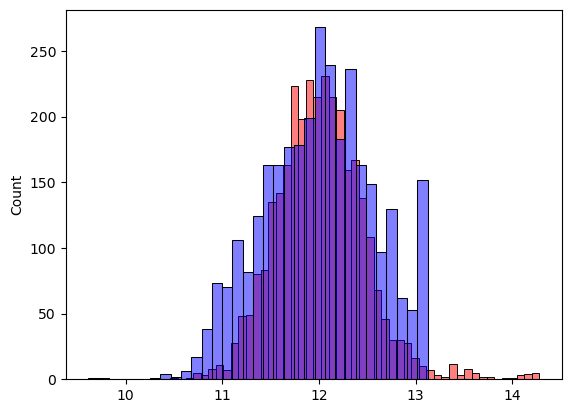

In [71]:
# By curiosity, we can also check the plot to see if the validation predicted values are close to the true validation values
sns.histplot(y_pred_val, color='red', alpha=0.5)
sns.histplot(y_val, color='blue', alpha=0.5)

In [72]:
# Calculate the corresponding validation RMSE:
rmse_mean_val = rmse(y_val, y_pred_val)

In [73]:
rmse_mean_val

0.34056998014793216

Interestingly, both RMSE values are identical.

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [74]:
# Set the regularization value list
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

## Regularized linear regression function

In [75]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Train with different values of regularization factor

In [77]:
for r in r_list:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r)
    y_pred = w0 + X_val_zero.dot(w)
    rmse_value = round(rmse(y_val, y_pred),2)
    print(f"With r={r}, RMSE value obtained on validation dataset is equal to {rmse_value}")

With r=0, RMSE value obtained on validation dataset is equal to 0.34
With r=1e-06, RMSE value obtained on validation dataset is equal to 0.34
With r=0.0001, RMSE value obtained on validation dataset is equal to 0.34
With r=0.001, RMSE value obtained on validation dataset is equal to 0.34
With r=0.01, RMSE value obtained on validation dataset is equal to 0.34
With r=0.1, RMSE value obtained on validation dataset is equal to 0.34
With r=1, RMSE value obtained on validation dataset is equal to 0.34
With r=5, RMSE value obtained on validation dataset is equal to 0.35
With r=10, RMSE value obtained on validation dataset is equal to 0.35


With r=0, we already have the lowest RMSE score (rounded to 2 digits).

# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

## RMSE calculation function

In [79]:
def compute_rmse_validation(seed, val_proportion, test_proportion):

    np.random.seed(seed)
    
    # Shuffle the indices of the filtered dataset (subset_df)
    n = len(subset_df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Shuffle the filtered dataset
    subset_df_shuffled = subset_df.iloc[idx]
    
    # Determine number of values for the train, validation and test sets
    n_val = int(val_proportion*n)
    n_test = int(test_proportion*n)
    n_train = n - (n_val+n_test)
    
    # Divide our filtered dataset into train, val and test datasets
    train_dataset = subset_df_shuffled[:n_train]
    val_dataset = subset_df_shuffled[n_train:n_train+n_val]
    test_dataset = subset_df_shuffled[n_train+n_val:]

    # Apply log transformation on target values for each dataset
    train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
    val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
    test_dataset['median_house_value'] = np.log1p(test_dataset['median_house_value'])
    
    # Extract target variable as numpy array
    y_train = train_dataset['median_house_value'].values
    y_val = val_dataset['median_house_value'].values
    y_test = test_dataset['median_house_value'].values
    
    # Remove the target column from our feature datasets
    del train_dataset['median_house_value']
    del val_dataset['median_house_value']
    del test_dataset['median_house_value']
    
    # Fill missing values by 0
    train_dataset_zero = train_dataset.fillna(0)
    val_dataset_zero = val_dataset.fillna(0)
    test_dataset_zero = test_dataset.fillna(0)
    
    # Prepare feature matrices
    X_train_zero = train_dataset_zero.values
    X_val_zero = val_dataset_zero.values
    X_test_zero = test_dataset_zero.values
    
    # Train without regularization
    w0_zero, w_zero = train_linear_regression(X_train_zero,y_train)
    y_pred_val = w0_zero + X_val_zero.dot(w_zero)
    rmse_val = rmse(y_val, y_pred_val)
    
    return rmse_val

## Results

In [82]:
# Setup seed_list values and seed_results that will contain validation dataset RMSE
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_results = []

# Loop over each seed values
for seed in seed_list:
    rmse_seed = compute_rmse_validation(seed,0.2,0.2)
    seed_results.append(rmse_seed)

C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\3066624569.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\3066624569.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
C:\Users\Melanie\AppData\Local\Temp\ipykernel_21944\3066624569.py:26: SettingWithCopyWarning: 
A value is trying to 

In [84]:
# See the RMSE scores obtained with the different seeds on validation dataset, without regularization
seed_results

[0.33773871601241534,
 0.33779993536620034,
 0.33842870067702435,
 0.3320049468307805,
 0.3394451862556948,
 0.34338197052658526,
 0.3385330211770785,
 0.3468747697304975,
 0.35127368659561153,
 0.334155826651761]

In [86]:
# Calculate the standard deviation of these RMSE scores
np.std(seed_results)

0.005465718180550711

The standard deviation of the different RMSE scores is equal to 0.005, which is low: we can concluded that our model is stable.

# Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [87]:
# Use seed 9
np.random.seed(9)

In [106]:
# Split the datasets:

# Shuffle the indices of the filtered dataset (subset_df)
n = len(subset_df)
idx = np.arange(n)
np.random.shuffle(idx)

# Shuffle the filtered dataset
subset_df_shuffled = subset_df.iloc[idx]

# Determine number of values for the train, validation and test sets
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

# Divide our filtered dataset into train, val and test datasets
train_dataset = subset_df_shuffled[:n_train]
val_dataset = subset_df_shuffled[n_train:n_train+n_val]
test_dataset = subset_df_shuffled[n_train+n_val:]

# Fill missing values by 0
train_dataset = train_dataset.fillna(0)
val_dataset = val_dataset.fillna(0)
test_dataset = test_dataset.fillna(0)

# Apply log transformation on target values for each dataset
train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
test_dataset['median_house_value'] = np.log1p(test_dataset['median_house_value'])

# Extract target variable as numpy array
y_train = train_dataset['median_house_value'].values
y_val = val_dataset['median_house_value'].values
y_test = test_dataset['median_house_value'].values

# Remove the target column from our feature datasets
del train_dataset['median_house_value']
del val_dataset['median_house_value']
del test_dataset['median_house_value']


In [107]:
# Combine train and validation datasets
train_dataset_full = pd.concat([train_dataset, val_dataset])
train_dataset_full = train_dataset_full.reset_index(drop=True)

y_train_full = np.concatenate([y_train,y_val])

In [108]:
train_dataset_full.shape

(12550, 8)

In [109]:
len(y_train_full)

12550

In [110]:
# Prepare features matrices
X_train_full = train_dataset_full.values
X_test = test_dataset.values

In [111]:
# Train with regularization (r=0.001)
w0_zero, w_zero = train_linear_regression_reg(X_train_full,y_train_full,0.001)
y_pred_test = w0_zero + X_test.dot(w_zero)
rmse_test = rmse(y_test, y_pred_test)

In [112]:
rmse_test

0.33190125847340035

We obtain a RMSE equal to 0.33 on the test set, with a trained model with a regularization equal to 0.001.